### Collaborative filtering methods for recommender systems are methods that are solely based on the past interactions between users and the target items. Thus, the input to a collaborative filtering system will be all historical data of user interactions with target items. This data is typically stored in a matrix where the rows are the users, and the columns are the items.

![Collaborative](1_hQAQ8s0-mHefYH83uDanGA.gif "Collaborative")

#### Content-based methods are more similar to classical machine learning, in the sense that we will build features based on user and item data and use that to help us make predictions. Our system input is then the features of the user and the features of the item. Our system output is the prediction of whether or not the user would like or dislike the item.

![Content](1_PfrZFBvhqD_8QyN64XdiIA.png "Content")

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/vikas/Desktop/ML/Machine Learning/ML_Dwarka_June19/datasets/movie_metadata.csv')

In [3]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
df.shape

(5043, 28)

###### Weighted Rating (WR) =   (v / (v+m) ).R  +  (m / (v+m) ).C

* v is the number of votes for the movie

* m is the minimum votes required

* R is the average rating of the movie

* C is the mean vote across the whole report
 

In [7]:
# average imdb score for movies. Calculating value of C
C = df['imdb_score'].mean()
print(C)

6.442137616498116


In [8]:
# minimum vote count. Calculating value of m
m = df['num_voted_users'].quantile(0.60)
m

53178.19999999998

In [9]:
# creating dataset with min vote count
df2 = df.copy().loc[df['num_voted_users'] >= m]

In [10]:
df2.shape

(2017, 28)

In [11]:
# calcuting score
def weighted_rating(x, m=m, C=C):
    v = x['num_voted_users']
    R = x['imdb_score']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
# Adding a score column
df2['score'] = df2.apply(weighted_rating , axis = 1)

In [13]:
df2 = df2.sort_values('score', ascending=False)

In [14]:
# Top 15 predictions
df2[['movie_title', 'num_voted_users', 'imdb_score', 'score']].head(15)

,movie_title,num_voted_users,imdb_score,score
1937,The Shawshank Redemption,1689764,9.3,9.212805
3466,The Godfather,1155770,9.2,9.078689
66,The Dark Knight,1676169,9.0,8.921345
2837,The Godfather: Part II,790926,9.0,8.838856
3355,Pulp Fiction,1324680,8.9,8.805139
339,The Lord of the Rings: The Return of the King,1215718,8.9,8.796993
1874,Schindler's List,865020,8.9,8.757651
97,Inception,1468200,8.8,8.717583
683,Fight Club,1347461,8.8,8.710479
836,Forrest Gump,1251222,8.8,8.703874


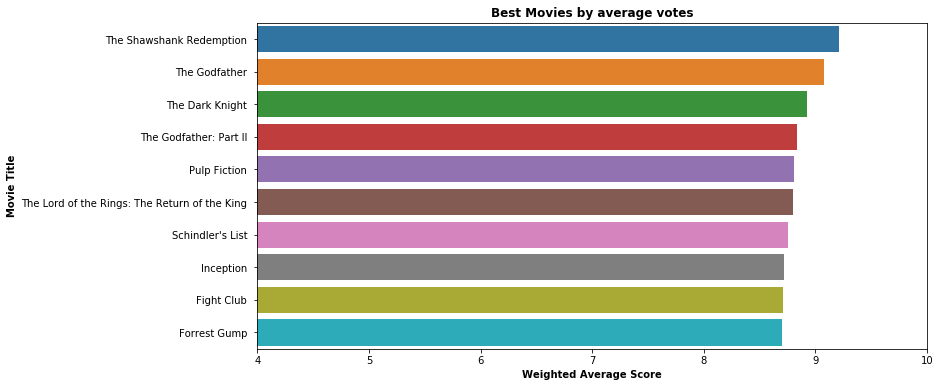

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
axis1=sns.barplot(x=df2['score'].head(10), y=df2['movie_title'].head(10), data=df2)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')